# GAMASI: Generic Asynchronous Multi-Agent Simulation Invoker

## Running simulation

In [1]:
import numpy as np

from src.Lab import Lab

lab = Lab()

In [2]:
simulation = lab.experiment(
    height=25, width=25,
    initial_population_count=100,
    max_total_duration=120, max_simulation_duration=1
)

Generating universe...	: Done in 0.000 s


Running simulation	: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

Interrupting population	: 218...
Simulation succeed...	: Returning data... Done in 1.203 s


## Analysis

### Statistics

#### Gathering & computing

In [3]:
print(simulation["universe"].population[2].death_date)

141936209


In [4]:
#stats = lab.gather_data(simulation)

In [5]:
#stats["agents_statistics"].to_csv("results/stats.csv")

#### Plotting some stats

In [6]:
#lab.plot_generation_stats(stats)

### Timelines

#### Population count

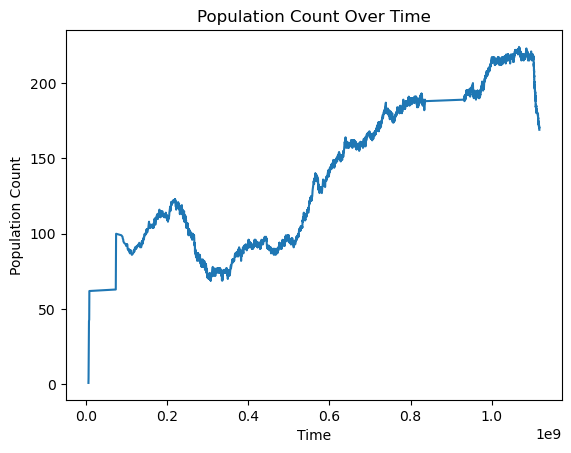

In [7]:
from matplotlib import pyplot as plt  # TODO Move to Lab
population_timeline = lab.get_temporal_data(simulation)
population_timeline.plot(y="population_count", legend=False)
plt.title('Population Count Over Time')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.show()

#### Spatial evolution

In [8]:
spatial_data = lab.get_spatial_data(simulation)

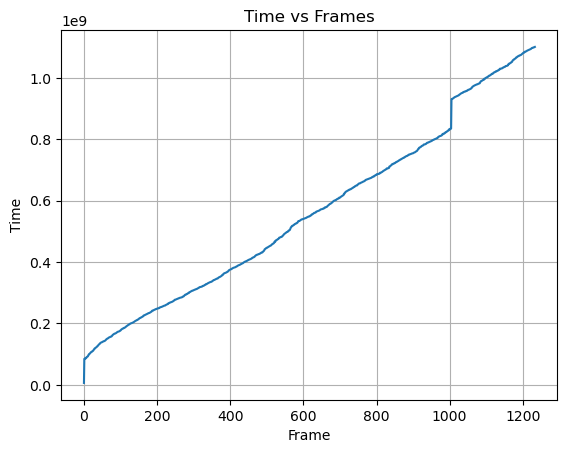

1234


In [9]:
import matplotlib.pyplot as plt

positions = spatial_data[0]

plt.plot(range(len(positions)), positions)
plt.xlabel('Frame')
plt.ylabel('Time')
plt.title('Time vs Frames')
plt.grid(True)
plt.show()
print(len(spatial_data[1]))

In [10]:
import imageio


gif_path = "results/output.gif"
imageio.mimsave(gif_path, spatial_data[1], duration=0.01, loop=0)

In [11]:
from IPython.display import HTML
width = 400
# Generate HTML to display the GIF with specified width and interpolation
html_code = f'<img src="{gif_path}" width="{width}" style="image-rendering: pixelated;">'
HTML(html_code)

In [12]:
import numpy as np
import tifffile

# Convert the list of 2D arrays into a 3D numpy array
stack_3d = np.stack(spatial_data[1], axis=0)

# Save the stack as a TIFF file
tifffile.imwrite('results/stacks/positions.tif', stack_3d)

In [13]:
import json

with open('results/positions.json', 'w') as json_file:
    json.dump(spatial_data[2], json_file)

In [14]:
import json

with open('results/timestamps.json', 'w') as json_file:
    json.dump(spatial_data[0], json_file)

[   6235476   84612890   86588164 ... 1100301446 1100780780 1101549469]
[1 2 2 ... 2 1 1]


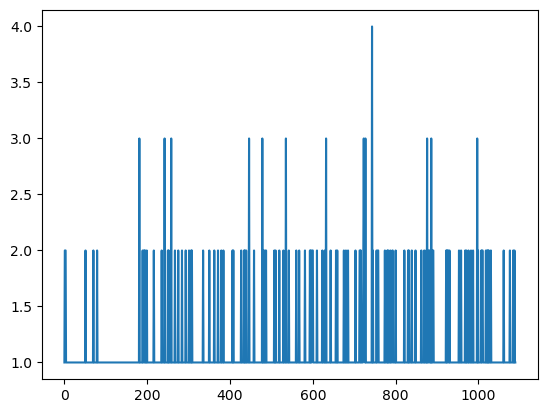

In [15]:
unique_values, counts = np.unique(spatial_data[0], return_counts=True)
print(unique_values)
print(counts)
# Creating bar plot
plt.plot(counts)


#### Actions

In [16]:
timeline = lab.get_timeline(simulation)
timeline

[{'id': 0,
  'decision': 'spawn',
  'action_time': 6235476,
  'action_success': True},
 {'id': 1,
  'decision': 'spawn',
  'action_time': 6404735,
  'action_success': True},
 {'id': 2,
  'decision': 'spawn',
  'action_time': 6446765,
  'action_success': True},
 {'id': 3,
  'decision': 'spawn',
  'action_time': 6482963,
  'action_success': True},
 {'id': 4,
  'decision': 'spawn',
  'action_time': 6513581,
  'action_success': True},
 {'id': 5,
  'decision': 'spawn',
  'action_time': 6546463,
  'action_success': True},
 {'id': 6,
  'decision': 'spawn',
  'action_time': 6580046,
  'action_success': True},
 {'id': 7,
  'decision': 'spawn',
  'action_time': 6615663,
  'action_success': True},
 {'id': 8,
  'decision': 'spawn',
  'action_time': 6647703,
  'action_success': True},
 {'id': 9,
  'decision': 'spawn',
  'action_time': 6680515,
  'action_success': True},
 {'id': 10,
  'decision': 'spawn',
  'action_time': 6709570,
  'action_success': True},
 {'id': 11,
  'decision': 'spawn',
  'acti

In [17]:
with open('results/timeline.json', 'w') as json_file:
    json.dump(timeline, json_file)

In [18]:
agents_data = lab.get_agents_data(simulation)
with open('results/agents_data.json', 'w') as json_file:
    json.dump(agents_data, json_file)

In [19]:
agents_data

{0: {'id': 0,
  'generation': 0,
  'parents': [],
  'start_date': 85735968,
  'death_date': 302354944,
  'children': [131, 237, 351, 436],
  'birth_success': True,
  'reaction_time': 0.0001,
  'speed': 100000.0,
  'energy_capacity': 200.0,
  'scope': 3,
  'color': (12, 118, 242)},
 1: {'id': 1,
  'generation': 0,
  'parents': [],
  'start_date': 84119831,
  'death_date': 155571386,
  'children': [102, 151],
  'birth_success': True,
  'reaction_time': 0.0001,
  'speed': 100000.0,
  'energy_capacity': 200.0,
  'scope': 3,
  'color': (186, 49, 228)},
 2: {'id': 2,
  'generation': 0,
  'parents': [],
  'start_date': 85964138,
  'death_date': 141936209,
  'children': [132],
  'birth_success': True,
  'reaction_time': 0.0001,
  'speed': 100000.0,
  'energy_capacity': 200.0,
  'scope': 3,
  'color': (132, 67, 228)},
 3: {'id': 3,
  'generation': 0,
  'parents': [],
  'start_date': 85993193,
  'death_date': 138518946,
  'children': [125],
  'birth_success': True,
  'reaction_time': 0.0001,
  '

In [20]:
agents_data[109]

{'id': 109,
 'generation': 1,
 'parents': [79],
 'start_date': 118094317,
 'death_date': 288320343,
 'children': [202, 299, 402],
 'birth_success': True,
 'reaction_time': 0.0001,
 'speed': 100000.0,
 'energy_capacity': 200.0,
 'scope': 3,
 'color': (219, 210, 116)}

In [21]:
agents_data[202]

{'id': 202,
 'generation': 2,
 'parents': [109],
 'start_date': 194631281,
 'death_date': 247172332,
 'children': [297],
 'birth_success': True,
 'reaction_time': 0.0001,
 'speed': 100000.0,
 'energy_capacity': 200.0,
 'scope': 3,
 'color': (219, 210, 116)}